# EXERCISE 0
Let $Y_i = X_i + [2 - max_i X_i]$

Prove that $P(Y_i \geq X_i) = 1 $

### Proof
Since $[2 - max_i X_i] \geq 0$,

$ Y_i = X_i + [2 - max_i X_i] \geq X_i $  $\forall i$

Therefore $Y_i \geq X_i$  $\forall i$

Thus $P(Y_i \geq X_i) = 1 $ ,   $ \forall i$

Q.E.D.

# EXERCISE 1
## Sub-Exercise 1
Estimate area(P) using Monte Carlo Integration. 

Final Area =  0.12189615148565239


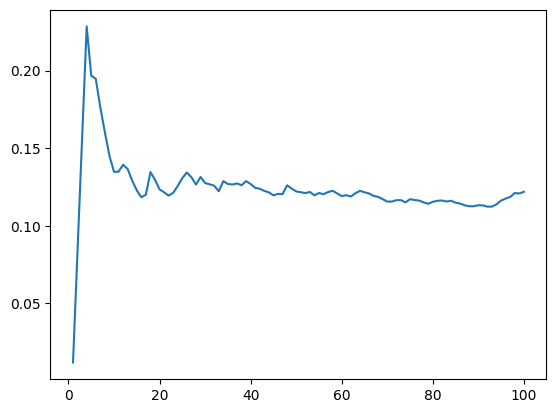

In [61]:
from numpy import random
from matplotlib import pyplot as plt
import numpy as np

NUM_SAMPLES = 100
i = 0

A = []
B = []
C = []
D = []
area_est = []

while i < NUM_SAMPLES:    
    A.append(random.beta(1, 1))
    B.append(random.beta(1, 1))
    C.append(random.beta(1, 1))
    D.append(random.beta(1, 1))
    area_est.append(abs(A[len(A)-1] * D[len(D)-1] - B[len(B)-1] * C[len(C)-1] ) /2)
    i += 1


print("Final Area = ", sum(area_est)/NUM_SAMPLES)
avarage_mean=np.cumsum(area_est)/np.cumsum(np.ones(NUM_SAMPLES))
plt.plot(np.arange(NUM_SAMPLES)+1,avarage_mean)




#Sub-Exercise 2
## Optimized Version


Final Area =  0.12046246522459224


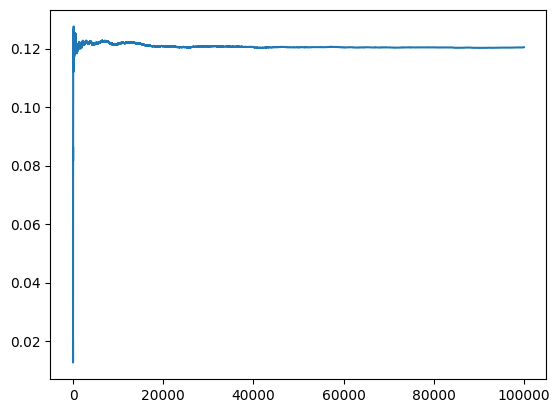

In [51]:
from numpy import random
from matplotlib import pyplot as plt
import numpy as np

NUM_SAMPLES = 100000

area_est = np.array(abs(random.beta(1, 1, NUM_SAMPLES) * random.beta(1,1,NUM_SAMPLES) - random.beta(1,1, NUM_SAMPLES) * random.beta(1,1, NUM_SAMPLES))/2)

print("Final Area = ", sum(area_est)/NUM_SAMPLES)
avarage_mean=np.cumsum(area_est)/np.cumsum(np.ones(NUM_SAMPLES))
plt.plot(np.arange(NUM_SAMPLES)+1,avarage_mean)

## Sub-Exercise 3
Compare the time of execution of your implementations.

In [57]:
from IPython.core.alias import default_aliases
from numpy import random
from matplotlib import pyplot as plt
import numpy as np
import time


N = [50, 500, 5000, 50000]

NUM_SAMPLES = 100000

for j in range(1,len(N)+1):
  start_algorithm_1 = time.time()
  A = []
  B = []
  C = []
  D = []
  area_est = []
  i = 0
  while i < NUM_SAMPLES:    
      A.append(random.beta(1, 1))
      B.append(random.beta(1, 1))
      C.append(random.beta(1, 1))
      D.append(random.beta(1, 1))
      area_est.append(abs(A[len(A)-1] * D[len(D)-1] - B[len(B)-1] * C[len(C)-1] ) /2)
      i += 1
  end_algorithm_2 = time.time()

  start_algorithm_2 = time.time()
  area_est = np.array(abs(random.beta(1, 1, NUM_SAMPLES) * random.beta(1,1,NUM_SAMPLES) - random.beta(1,1, NUM_SAMPLES) * random.beta(1,1, NUM_SAMPLES))/2)
  end_algorithm_1 = time.time()

  delta1 = end_algorithm_1 - start_algorithm_1
  delta2 = end_algorithm_2 - start_algorithm_2
  print("RUN ", j, ", N = ", N[j-1], ":")
  print("Time algorithm 1 = ", delta1)
  print("Time algorithm 2 = ", delta2)


RUN  1 , N =  50 :
Time algorithm 1 =  0.49433350563049316
Time algorithm 2 =  -1.1920928955078125e-06
RUN  2 , N =  500 :
Time algorithm 1 =  0.5027451515197754
Time algorithm 2 =  -1.430511474609375e-06
RUN  3 , N =  5000 :
Time algorithm 1 =  0.7686831951141357
Time algorithm 2 =  -1.430511474609375e-06
RUN  4 , N =  50000 :
Time algorithm 1 =  0.8698279857635498
Time algorithm 2 =  -9.5367431640625e-07


It is evident as the second algorithm is much faster, and as it is independent from the size of N.

## Sub-Exercise 4
$Var(Area(P)) = Var( 0.5 | A * D - B * C | ) = 0.25 Var(| A * D - B * C | ) $

\

With:

$ Var(| A * D - B * C | )  = Var(A * D - B * C) + (E( A * D - B * C ))^2 - (E( | A * D - B * C | ) )^2 $

\

Where, studying each of the three terms:

\

* $ Var(A * D - B * C) = Var(A*D) - Var (B*C) + 2Cov(A*D,B*C) = Var(A*D) - Var (B*C) = Var(A)*Var(D) + Var(A)*E(D)^2 + Var(D) * E(A)^2 - (Var(B)*Var(C) + Var(B)*E(C)^2 + Var(B) * E(C)^2 ) < ∞ $

\

* $ E( A * D - B * C ) = E(A) * E(D) - E(B) * E(C) < ∞ $

\

* For 
$E( | A * D - B * C | ) $ I distinguish two cases: the first in which the quantitity inside is greater than 0, the second in which is less than zero:

 * $E( A * D - B * C ) < \infty $ as already proved.
 * $E( B * C - A * D ) = E(B) * E(C) - E(A) * E(D) < \infty $. 

\

In conclusion:

$Var(Area(P)) = Var(| A * D - B * C | ) <\infty$

# EXERCISE 2
## Cow-Vegetation Model


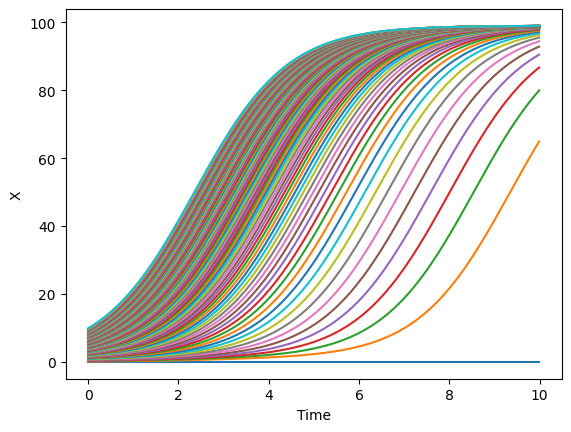

In [64]:
import scipy
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

class DynamicalSystem1D(object):
  def __init__(self):
      super().__init__()

  def ode(x,t):
    pass
  
  def solve(self,x0,t):
    return scipy.integrate.odeint(self.ode,x0,t)

  def plot(self,xlist,t):
    
    for x0 in xlist:
      x=self.solve(x0,t)
      plt.plot(t,x)
    plt.xlabel("Time")
    plt.ylabel("X")

class cow_vegetation(DynamicalSystem1D):
  def __init__(self,h):
    super().__init__()
    self.h=h

  def ode(self,x,t):
    return x*(1-x/100) - self.h*(x**2/(1+x**2))

  def plot(self,x0,t):
    super().plot(x0,t)


h = 1
cow_vegetation(h).plot(np.arange(100)/10,np.arange(1000)/100)

There are 2 equilibrium points, which are:

*   0 : unstable
*   a value very close to 100 (I would say 99) : stable



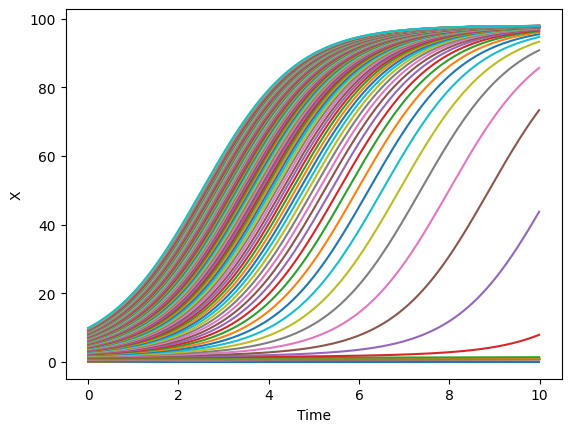

In [65]:
h = 2
cow_vegetation(h).plot(np.arange(100)/10,np.arange(1000)/100)

There are 4 equilibrium points, which are:

*   0 : unstable 
*   a value little smaller than 1 : stable
*   a value little greater than the preciding one (probably greater than 1) : unstable
*   a value close to 100 (it looks smaller than the one in the previous case, like 98) : stable

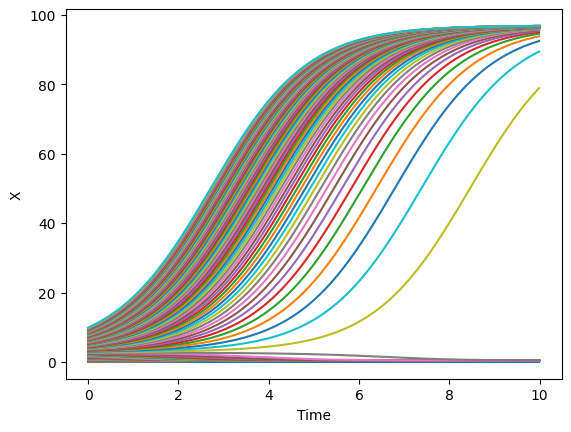

In [66]:
h = 3
cow_vegetation(h).plot(np.arange(100)/10,np.arange(1000)/100)

There are 3 equilibrium points, which are:

*   0 : unstable
*   a value close to 0 : stable
*   a value close to 100 (even smaller then the previous cases, let's say 97): stable

# EXERCISE 3
Study the following dynamical system:
$
y_{n+1} = 0.5 ( y_n^2 - 3y_n + 6)
$

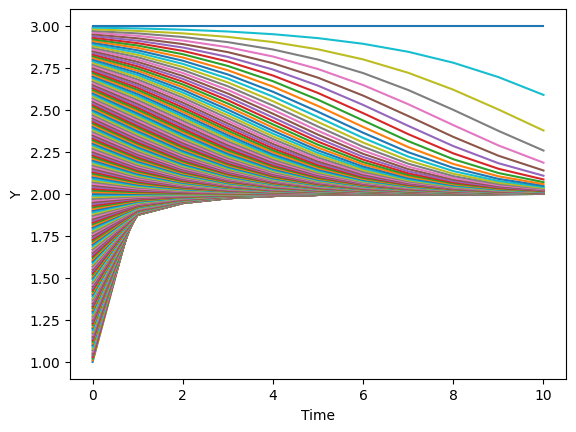

In [45]:
import numpy as np
import matplotlib.pyplot as plt

class DiscreteDynamicalSystem1D(object):
    def __init__(self):
        super().__init__()
        

    def autonomous_equation(self, a):
        return (a * a - 3 * a + 6) / 2
    
    def equation(self,a,n):
        return self.autonomous_equation(a)

    def solve(self,a0,n):
        sol=np.zeros(n+1);
        sol[0]=a0
        for i in range(1,n+1):
            sol[i]=self.equation(sol[i-1],i-1)
        return sol   

    def plot(self,alist,n):
        for a0 in alist:
            sol=self.solve(a0,n)
            plt.plot(np.arange(n+1),sol)
            plt.xlabel("Time")
            plt.ylabel("Y")
    
    def cobbweb_plot(self,a0,n):
        sol=self.solve(a0,n)
        x=np.linspace(np.min(sol)-(np.max(sol)-np.min(sol))/2,np.max(sol)+(np.max(sol)-np.min(sol))/2,100000)
        plt.plot(x,x)
        x_path=np.zeros(2*n)
        y_path=np.zeros(2*n)
        x_path[0]=sol[0]
        y_path[0]=0
        x_path[1]=sol[0]
        y_path[1]=sol[1]
        ###Constructing_path
        for i in range(2,2*n,2):
            x_path[i]=y_path[i-1]
            y_path[i]=y_path[i-1]
            x_path[i+1]=x_path[i]
            y_path[i+1]=sol[i//2+1]
        plt.plot(x,self.autonomous_equation(x))
        plt.plot(x_path,y_path)          
        plt.xlabel("X")
        plt.ylabel("f(X)")

y0 = [1,2,3]
sequence=DiscreteDynamicalSystem1D()
sequence.plot(np.arange(100,301)/100,10)

There are 2 equilibrium points:

*  y = 3 unstable (in fact f'(3) = 1.5 > 1)
*  y = 2 stable (in fact f'(2) = 0.5 < 1)